In [155]:
from misc import FrozenLakeEnv, make_grader
env = FrozenLakeEnv(map_name='4x4', is_slippery=False)

In [156]:
import numpy as np, numpy.random as nr, gym
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)

# Seed RNGs so you get the same printouts as me
env.seed(0); from gym.spaces import prng; prng.seed(10)
# Generate the episode
env.reset()
for t in range(100):
    env.render()
    a = env.action_space.sample()
    ob, rew, done, _ = env.step(a)
    if done:
        break
assert done
env.render();


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG


In [159]:
class MDP(object):
    def __init__(self, P, nS, nA, desc=None):
        self.P = P # state transition and reward probabilities, explained below
        self.nS = nS # number of states
        self.nA = nA # number of actions
        self.desc = desc # 2D array specifying what each grid cell means (used for plotting)
        
def value_iteration(mdp, gamma, nIt, grade_print=print):
    """
    Inputs:
        mdp: MDP
        gamma: discount factor
        nIt: number of iterations, corresponding to n above
    Outputs:
        (value_functions, policies)
        
    len(value_functions) == nIt+1 and len(policies) == nIt
    """
    grade_print("Iteration | max|V-Vprev| | # chg actions | V[0]")
    grade_print("----------+--------------+---------------+---------")
    Vs = [np.zeros(mdp.nS)] # list of value functions contains the initial value function V^{(0)}, which is zero
    pis = []
    for it in range(nIt):
        oldpi = pis[-1] if len(pis) > 0 else None # \pi^{(it)} = Greedy[V^{(it-1)}]. Just used for printout
        Vprev = Vs[-1] # V^{(it)}
        
        # Your code should fill in meaningful values for the following two variables
        # pi: greedy policy for Vprev (not V), 
        #     corresponding to the math above: \pi^{(it)} = Greedy[V^{(it)}]
        #     ** it needs to be numpy array of ints **
        # V: bellman backup on Vprev
        #     corresponding to the math above: V^{(it+1)} = T[V^{(it)}]
        #     ** numpy array of floats **
        
        V = np.zeros(mdp.nS)
        pi = np.zeros(mdp.nS)
        # for each state in the set of states
        for state in mdp.P:
            maxv = 0
            # loop through all the actions in the state
            for action in mdp.P[state]:
                v = 0
                for probability, nextstate, reward in mdp.P[state][action]:
                    v += probability * (reward + gamma * Vprev[nextstate])
                # if this the largest value for this state, update 
                if v > maxv:
                    maxv = v
                    # greedy policy
                    pi[state] = action
            # note above, avoid updating value function in place
            V[state] = maxv

        max_diff = np.abs(V - Vprev).max()
        nChgActions="N/A" if oldpi is None else (pi != oldpi).sum()
        grade_print("%4i      | %6.5f      | %4s          | %5.3f"%(it, max_diff, nChgActions, V[0]))
        Vs.append(V)
        pis.append(pi)
    return Vs, pis

# HG use unwrapped to access 
mdp = MDP( {s : {a : [tup[:3] for tup in tups] for (a, tups) in a2d.items()} for (s, a2d) in env.unwrapped.P.items()}, env.unwrapped.nS, env.unwrapped.nA, env.unwrapped.desc)
GAMMA = 0.95 # we'll be using this same value in subsequent problems
Vs_VI, pis_VI = value_iteration(mdp, gamma=GAMMA, nIt=20)

Iteration | max|V-Vprev| | # chg actions | V[0]
----------+--------------+---------------+---------
   0      | 1.00000      |  N/A          | 0.000
   1      | 0.95000      |    2          | 0.000
   2      | 0.90250      |    2          | 0.000
   3      | 0.85737      |    2          | 0.000
   4      | 0.81451      |    2          | 0.000
   5      | 0.77378      |    1          | 0.774
   6      | 0.00000      |    0          | 0.774
   7      | 0.00000      |    0          | 0.774
   8      | 0.00000      |    0          | 0.774
   9      | 0.00000      |    0          | 0.774
  10      | 0.00000      |    0          | 0.774
  11      | 0.00000      |    0          | 0.774
  12      | 0.00000      |    0          | 0.774
  13      | 0.00000      |    0          | 0.774
  14      | 0.00000      |    0          | 0.774
  15      | 0.00000      |    0          | 0.774
  16      | 0.00000      |    0          | 0.774
  17      | 0.00000      |    0          | 0.774
  18      | 0.0000

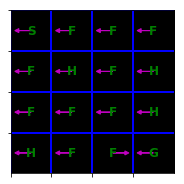

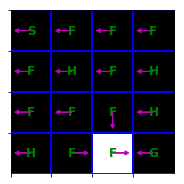

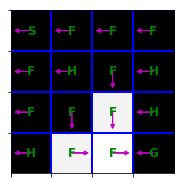

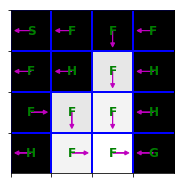

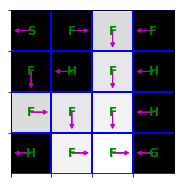

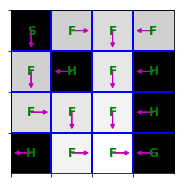

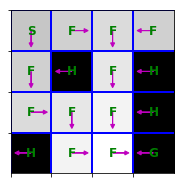

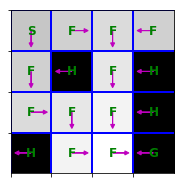

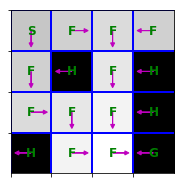

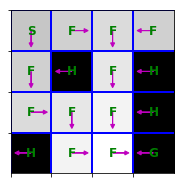

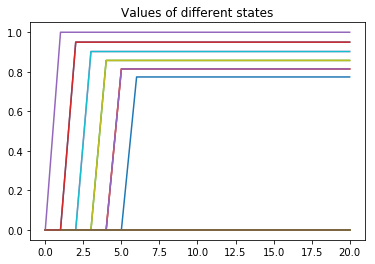

In [160]:
for (V, pi) in zip(Vs_VI[:10], pis_VI[:10]):
    plt.figure(figsize=(3,3))
    plt.imshow(V.reshape(4,4), cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    ax.set_xticks(np.arange(4)-.5)
    ax.set_yticks(np.arange(4)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {0: (-1, 0), 1:(0, -1), 2:(1,0), 3:(-1, 0)}
    Pi = pi.reshape(4,4)
    for y in range(4):
        for x in range(4):
            a = Pi[y, x]
            u, v = a2uv[a]
            plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1) 
            plt.text(x, y, str(env.unwrapped.desc[y,x].item().decode()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
    plt.grid(color='b', lw=2, ls='-')
plt.figure()
plt.plot(Vs_VI)
plt.title("Values of different states");

In [161]:
def compute_vpi(pi, mdp, gamma):
    # use pi[state] to access the action that's prescribed by this policy
    a = np.identity(mdp.nS) 
    b = np.zeros(mdp.nS) 
    for state in range(mdp.nS):
        for probability, nextstate, reward in mdp.P[state][pi[state]]:
            a[state][nextstate] = a[state][nextstate] - gamma * probability
            b[state] += probability * reward
    
    V = np.linalg.solve(a, b)
    return V


def compute_qpi(vpi, mdp, gamma):
    print(mdp.nS, mdp.nA)
    Qpi = np.zeros([mdp.nS, mdp.nA]) # REPLACE THIS LINE WITH YOUR CODE
    for state in range(mdp.nS):
        for action in range(mdp.nA):
            for probability, nextstate, reward in mdp.P[state][action]:
                Qpi[state][action] += probability * (reward + gamma * vpi[nextstate]) 
    return Qpi

actual_val = compute_vpi(np.arange(16) % mdp.nA, mdp, gamma=GAMMA)
Qpi = compute_qpi(np.arange(mdp.nS), mdp, gamma=0.5)

print("Actual: ", actual_val)
print("Actual: ", Qpi)

16 4
Actual:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
Actual:  [[ 0.   2.   0.5  0. ]
 [ 0.   2.5  1.   0.5]
 [ 0.5  3.   1.5  1. ]
 [ 1.   3.5  1.5  1.5]
 [ 2.   4.   2.5  0. ]
 [ 2.5  2.5  2.5  2.5]
 [ 2.5  5.   3.5  1. ]
 [ 3.5  3.5  3.5  3.5]
 [ 4.   6.   4.5  2. ]
 [ 4.   6.5  5.   2.5]
 [ 4.5  7.   5.5  3. ]
 [ 5.5  5.5  5.5  5.5]
 [ 6.   6.   6.   6. ]
 [ 6.   6.5  7.   4.5]
 [ 6.5  7.   8.5  5. ]
 [ 7.5  7.5  7.5  7.5]]


Iteration | # chg actions | V[0]
----------+---------------+---------
16 4
   0      |      1        | -0.00000
16 4
   1      |      2        | -0.00000
16 4
   2      |      2        | -0.00000
16 4
   3      |      2        | -0.00000
16 4
   4      |      2        | -0.00000
16 4
   5      |      1        | 0.00000
16 4
   6      |      0        | 0.99501
16 4
   7      |      0        | 0.99501
16 4
   8      |      0        | 0.99501
16 4
   9      |      0        | 0.99501
16 4
  10      |      0        | 0.99501
16 4
  11      |      0        | 0.99501
16 4
  12      |      0        | 0.99501
16 4
  13      |      0        | 0.99501
16 4
  14      |      0        | 0.99501
16 4
  15      |      0        | 0.99501
16 4
  16      |      0        | 0.99501
16 4
  17      |      0        | 0.99501
16 4
  18      |      0        | 0.99501
16 4
  19      |      0        | 0.99501


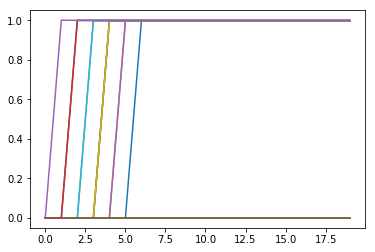

In [162]:
def policy_iteration(mdp, gamma, nIt, grade_print=print):
    Vs = []
    pis = []
    pi_prev = np.zeros(mdp.nS,dtype='int')
    pis.append(pi_prev)
    grade_print("Iteration | # chg actions | V[0]")
    grade_print("----------+---------------+---------")
    for it in range(nIt):        
        # YOUR CODE HERE
        # you need to compute qpi which is the state-action values for current pi
        vpi = compute_vpi(pis[-1], mdp, gamma=gamma)
        qpi = compute_qpi(vpi, mdp, gamma=gamma)
        pi = qpi.argmax(axis=1)
        grade_print("%4i      | %6i        | %6.5f"%(it, (pi != pi_prev).sum(), vpi[0]))
        Vs.append(vpi)
        pis.append(pi)
        pi_prev = pi
    return Vs, pis
Vs_PI, pis_PI = policy_iteration(mdp, gamma=0.999, nIt=20)
plt.plot(Vs_PI);

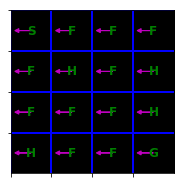

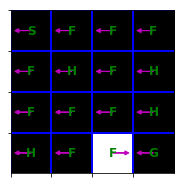

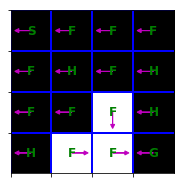

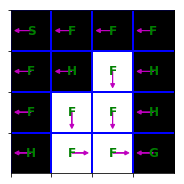

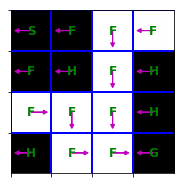

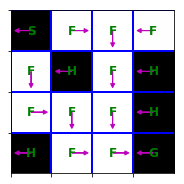

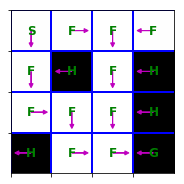

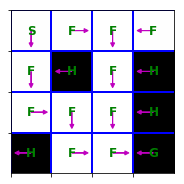

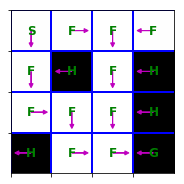

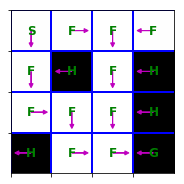

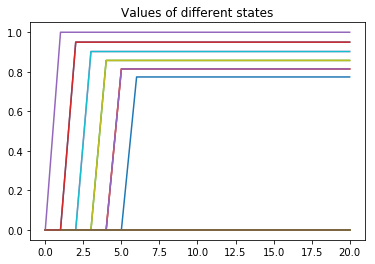

In [163]:
for (V, pi) in zip(Vs_PI[:10], pis_PI[:10]):
    plt.figure(figsize=(3,3))
    plt.imshow(V.reshape(4,4), cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    ax.set_xticks(np.arange(4)-.5)
    ax.set_yticks(np.arange(4)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {0: (-1, 0), 1:(0, -1), 2:(1,0), 3:(-1, 0)}
    Pi = pi.reshape(4,4)
    for y in range(4):
        for x in range(4):
            a = Pi[y, x]
            u, v = a2uv[a]
            plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1) 
            plt.text(x, y, str(env.unwrapped.desc[y,x].item().decode()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
    plt.grid(color='b', lw=2, ls='-')
plt.figure()
plt.plot(Vs_VI)
plt.title("Values of different states");

In [23]:
from crawler_env import CrawlingRobotEnv


env = CrawlingRobotEnv(
    render=True, # turn render mode on to visualize random motion
)

# standard procedure for interfacing with a Gym environment
cur_state = env.reset() # reset environment and get initial state
ret = 0.
done = False
i = 0
while not done:
    action = env.action_space.sample() # sample an action randomly
    next_state, reward, done, info = env.step(action)
    ret += reward
    cur_state = next_state
    i += 1
    if i == 1500:
        break # for the purpose of this visualization, let's only run for 1500 steps
        # also note the GUI won't close automatically

In [24]:
# you can close the visualization GUI with the following method 
env.close_gui()

In [58]:
from collections import defaultdict
import random

q_vals = defaultdict(lambda: np.array([0. for _ in range(env.action_space.n)]))

def eps_greedy(q_vals, eps, state):
    """
    Inputs:
        q_vals: q value tables
        eps: epsilon
        state: current state
    Outputs:
        random action with probability of eps; argmax Q(s, .) with probability of (1-eps)
    """
    # you might want to use random.random() to implement random exploration
    #   number of actions can be read off from len(q_vals[state])
    import random
    # YOUR CODE HERE
    if random.random() < eps:
        # randomly select action from state
        action = np.random.choice(len(q_vals[state]))
    else:
        # greedily select action from state
        action = np.argmax(q_vals[state])
    return action

def q_learning_update(gamma, alpha, q_vals, cur_state, action, next_state, reward):
    """
    Inputs:
        gamma: discount factor
        alpha: learning rate
        q_vals: q value table
        cur_state: current state
        action: action taken in current state
        next_state: next state results from taking `action` in `cur_state`
        reward: reward received from this transition
    
    Performs in-place update of q_vals table to implement one step of Q-learning
    """
    # YOUR CODE HERE
    target = reward + gamma * np.max(q_vals[next_state])
    q_vals[cur_state][action] = (1 - alpha) * q_vals[cur_state][action] + alpha * target
    
def greedy_eval():
    """evaluate greedy policy w.r.t current q_vals"""
#     test_env = CrawlingRobotEnv(horizon=np.inf)
    prev_state = env.reset()
    ret = 0.
#     done = False
#     H = 100
#     for i in range(H):
    action = np.argmax(q_vals[prev_state])
    state, reward, done, info = env.step(action)
    ret += reward
    prev_state = state
    return ret / 1

In [67]:
import numpy as np

env = FrozenLakeEnv()
q_vals = defaultdict(lambda: np.array([0. for _ in range(env.action_space.n)]))
gamma = 0.95
alpha = 0.8
eps = 0.7
cur_state = env.reset()

for itr in range(300000):
    # YOUR CODE HERE
    # Hint: use eps_greedy & q_learning_update
    # select action using eps_greedy
    action = eps_greedy(q_vals, eps, cur_state)
    # run action
    next_state, reward, done, info = env.step(action)
    # update q value
    q_learning_update(gamma, alpha, q_vals, cur_state, action, next_state, reward)
    cur_state = next_state
    
    if itr % 50000 == 0: # evaluation
        print("Itr %i # Average speed: %.2f" % (itr, greedy_eval()))

Itr 0 # Average speed: 0.00
Itr 50000 # Average speed: 0.00
Itr 100000 # Average speed: 0.00
Itr 150000 # Average speed: 0.00
Itr 200000 # Average speed: 0.00
Itr 250000 # Average speed: 0.00


In [68]:
prev_state = env.reset()
ret = 0.
done = False
while not done:
    env.render()
    action = np.argmax(q_vals[prev_state])
    state, reward, done, info = env.step(action)
    print(action, state, reward, done, info)
    ret += reward
    prev_state = state
env.render()    


SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.1}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.8}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 0 0.0 False {'prob': 0.1}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 4 0.0 False {'prob': 0.1}
  (Left)
SFFF
FHFH
FFFH
HFFG
0 4 0.0 Fa

In [18]:
env = CrawlingRobotEnv(render=True, horizon=3000)
prev_state = env.reset()
ret = 0.
done = False
while not done:
    action = np.argmax(q_vals[prev_state])
    state, reward, done, info = env.step(action)
    ret += reward
    prev_state = state

In [76]:
action_size = env.action_space.n
state_size = env.observation_space.n

qtable = np.zeros((state_size, action_size))
print(qtable)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0

In [118]:
total_episodes = 15000        # Total episodes
learning_rate = 0.2           # Learning rate
max_steps = 200                # Max steps per episode
gamma = 0.99                  # Discounting rate

# Exploration parameters
epsilon = 1                # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.00005             # Exponential decay rate for exploration prob

In [119]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.07786666666666667
[[  6.197e-01   6.209e-01   6.293e-01   6.211e-01]
 [  6.207e-01   6.276e-01   6.374e-01   6.300e-01]
 [  6.331e-01   6.356e-01   6.497e-01   6.441e-01]
 [  6.426e-01   6.432e-01   6.645e-01   6.501e-01]
 [  6.524e-01   6.775e-01   6.675e-01   6.587e-01]
 [  6.633e-01   6.889e-01   6.750e-01   6.605e-01]
 [  6.659e-01   6.930e-01   6.777e-01   6.688e-01]
 [  6.711e-01   6.853e-01   6.804e-01   6.721e-01]
 [  6.203e-01   6.230e-01   6.251e-01   6.203e-01]
 [  6.231e-01   6.278e-01   6.328e-01   6.285e-01]
 [  6.285e-01   6.244e-01   6.391e-01   6.414e-01]
 [  6.284e-01   1.029e-01   6.537e-01   6.538e-01]
 [  6.480e-01   6.502e-01   6.944e-01   6.633e-01]
 [  6.740e-01   6.750e-01   7.027e-01   6.711e-01]
 [  6.921e-01   7.160e-01   7.071e-01   6.776e-01]
 [  6.909e-01   7.254e-01   6.922e-01   6.763e-01]
 [  6.225e-01   6.224e-01   6.232e-01   6.214e-01]
 [  6.248e-01   6.252e-01   6.249e-01   6.266e-01]
 [  6.233e-01   5.896e-01   3.355e-02   6.048

In [121]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 35
****************************************************
EPISODE  1
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 21
****************************************************
EPISODE  2
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 16
****************************************************
EPISODE  3
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 24
****************************************************
EPISODE  4
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 16


In [135]:
qtable[0][3]

0.62110657384563472